In [0]:
import os ,sys,math
import cv2
import matplotlib.pyplot as plt
import numpy as np

pi=3.141592
r = 64

src = '/content/'

def rotation(org,degree):
  h, w = org.shape[:2]

  matrix = cv2.getRotationMatrix2D((w/2, h/2),degree,1)
  rot_org = cv2.warpAffine(org, matrix, (w, h))
  return rot_org

def merger(piece):

  degree = int(360/piece)

  #rad = (degree*pi)/180
  rad_list = [(((degree+x)*pi)/180) for x in range(1,6)]

  org = cv2.imread(src+filename,cv2.IMREAD_GRAYSCALE)
  org = tight(org)
  fig = plt.figure()
  ax1 = fig.add_subplot(1,3,1)
  ax1.imshow(org,'gray')

  th,org_inv = cv2.threshold(org,120,255,cv2.THRESH_BINARY_INV)
  passive = np.zeros([128,128])
  for rad in rad_list:
    for i in range(1,64):
        for j in range(65,128):
            if ((65-i)*(65-i)+(64-j)*(64-j)) < r*r:
                if int(((65-i)/(j-64))) == int(math.tan(rad)):
                    org_inv[i, j] = 255

  ax2 = fig.add_subplot(1,3,2)
  ax2.imshow(org_inv,'gray')

  th,org = cv2.threshold(org_inv,120,255,cv2.THRESH_BINARY_INV)

  ax3 = fig.add_subplot(1,3,3)
  ax3.imshow(org,'gray')

  degree_list = [x for x in range(1,360,degree)]
  rot_img_list=[]

  for degree in degree_list:
    rot_img = rotation(org,degree)
    rot_img_list.append(rot_img) 

  th,org_inv = cv2.threshold(org,120,255,cv2.THRESH_BINARY_INV)

  fig = plt.figure()
  for rot_img,i in zip(rot_img_list,[x for x in range(1,degree)]):
    fig.add_subplot(1,piece,i)
    plt.imshow(rot_img,'gray')


  img_list = []
  for rot_img in rot_img_list:
    th,img = cv2.threshold(rot_img,120,255,cv2.THRESH_BINARY_INV)
    img_list.append(img)

  merge_img = np.zeros([128,128])
  for img in img_list:
    merge_img = merge_img+img

  th,org_th = cv2.threshold(merge_img,120,255,cv2.THRESH_BINARY_INV)
  Passive=np.zeros([128,128])
  for ely in range(0,128):
      for elx in range(0,128):
          if (ely-0.5-(128)/2)**2+(elx-0.5-(128)/2)**2 > ((128/2-0.5)-2)**2: 
              Passive[ely,elx] = 255;
          else:
              Passive[ely,elx] = 0;

  fig = plt.figure()
  ax1 = fig.add_subplot(1,2,1)
  ax1.imshow(org_th,'gray')

  org_th1 = Passive+org_th
  thres,New= cv2.threshold(org_th1,254,255,cv2.THRESH_BINARY)

  ax2 = fig.add_subplot(1,2,2)
  cv2.imwrite(src+'merge_'+filename,New)

  img_org = cv2.imread(src+'merge_'+filename,cv2.IMREAD_GRAYSCALE)
  img_trim = tight(img_org)
  ax2.imshow(img_trim,'gray')
  cv2.imwrite(src+'merge_'+filename,img_trim)

def tight(img):
    
  org1 = cv2.resize(img,(256,256))
  org1 = cv2.bilateralFilter(org1,-1,0.3,5)
  #ret,org = cv2.threshold(org,200,255,cv2.THRESH_BINARY)
  
  image_gray = org1
  
  image = cv2.resize(image_gray,(256,256))
  blur = cv2.medianBlur(image,13)
  blur = cv2.GaussianBlur(blur,(13,13),0)
  blur = cv2.GaussianBlur(blur,(13,13),0)
  edged = cv2.Canny(blur, 4, 250)

  contours, _ = cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  total = 0

  # 외곽선 그리는 용도. 이미지에 그리기 때문에 이 코드 적용하면 원래 이미지에
  # 초록색 선 생김
  contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 1)

  contours_xy = np.array(contours)
  contours_xy.shape
  x_min, x_max = 0,0
  value = []
  for i in range(len(contours_xy)):
      for j in range(len(contours_xy[i])):
          value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
          x_min = min(value)
          x_max = max(value)

  # y의 min과 max 찾기
  y_min, y_max = 0,0
  value = []
  for i in range(len(contours_xy)):
      for j in range(len(contours_xy[i])):
          value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
          y_min = min(value)
          y_max = max(value)
  

  x = x_min
  y = y_min
  w = x_max-x_min
  h = y_max-y_min

  img_trim = org1[y:y+h, x:x+w]
  img_trim = cv2.resize(img_trim,(128,128))
  
  return img_trim
  #cv2.imwrite(src+'merge_'+filename+'.png',img_trim)

# 회전 및 병합(여백자르기 포함)

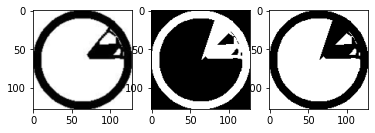

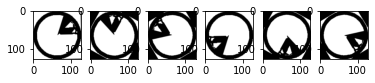

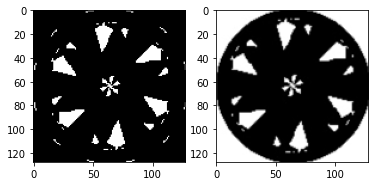

In [0]:
filename =  '579_1_0.25_0.45_0.267029_881.382.jpg'
piece = 6
merger(piece)

In [0]:
import os
import zipfile
 
fantasy_zip = zipfile.ZipFile('/content/2.zip', 'w')
 
for folder, subfolders, files in os.walk('/content'):
 
    for file in files:
        if file.endswith('.jpg'):
            fantasy_zip.write(os.path.join(folder, file), os.path.relpath(os.path.join(folder,file), 'C:||wheel'), compress_type = zipfile.ZIP_DEFLATED)
 
fantasy_zip.close()